In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr
import numpy as np

df = pd.read_excel('dsa210data.xlsx')

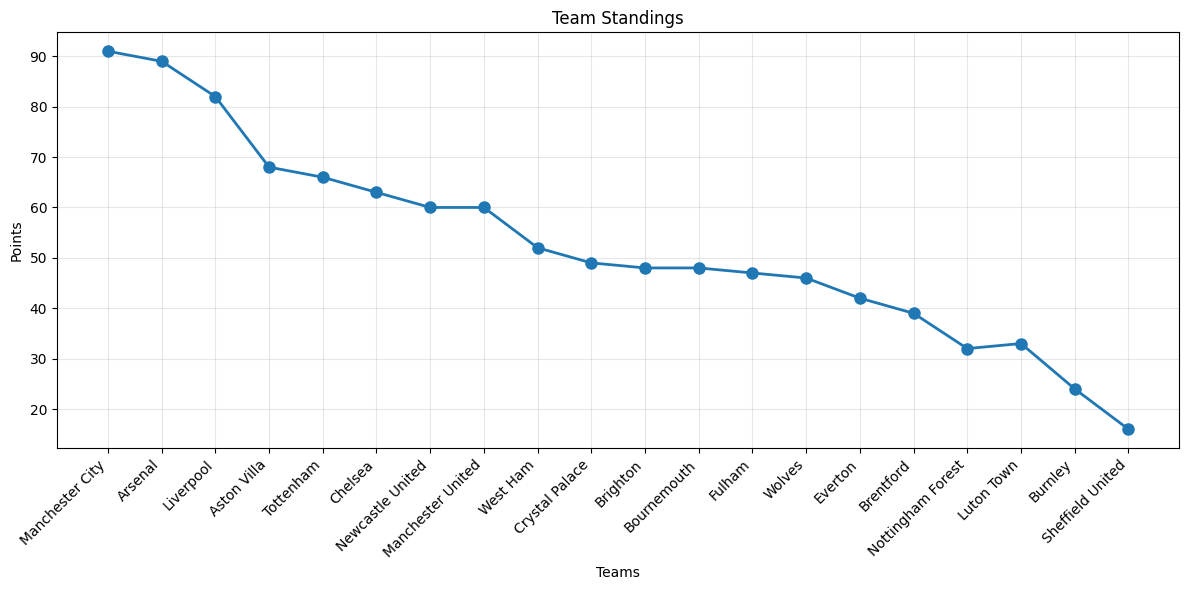

In [2]:
# 1. Team Points
plt.figure(figsize=(12, 6))
plt.plot(df['Team'], df['Points'], marker='o', linewidth=2, markersize=8)
plt.xticks(rotation=45, ha='right')
plt.title('Team Standings')
plt.xlabel('Teams')
plt.ylabel('Points')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

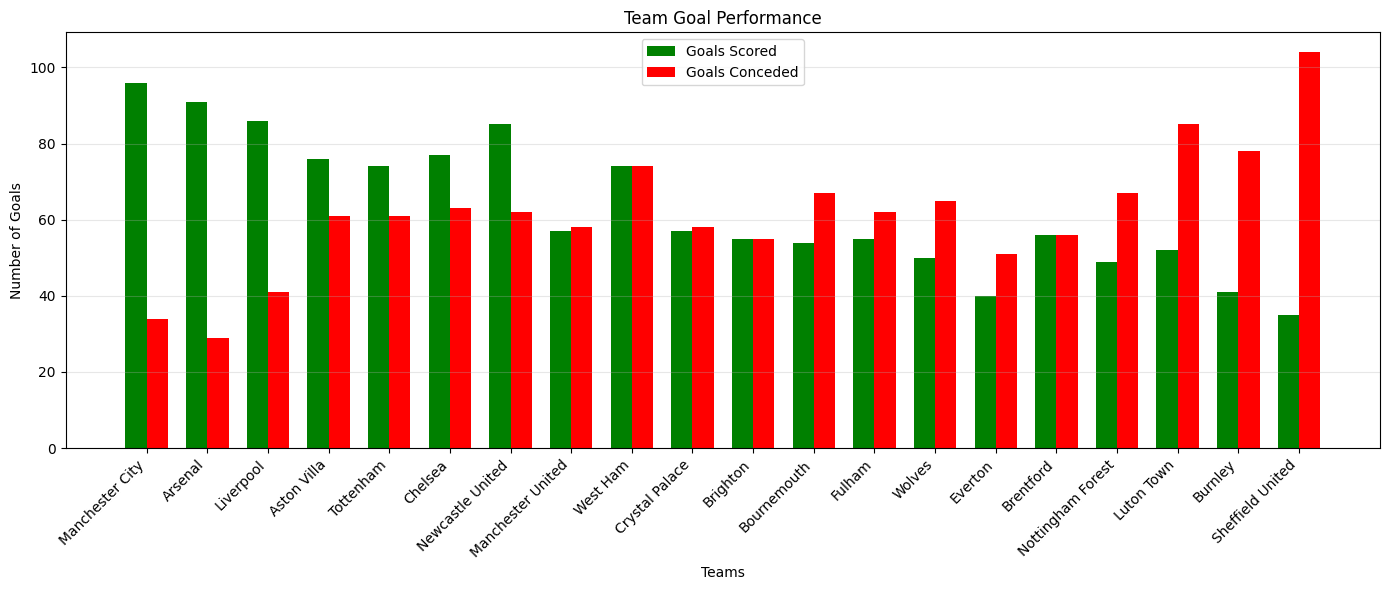

In [3]:
# 2. Goal Performance 
plt.figure(figsize=(14, 6))
x = np.arange(len(df['Team']))
width = 0.35

plt.bar(x - width/2, df['Goals Scored'], width, label='Goals Scored', color='green')
plt.bar(x + width/2, df['Goals Conceded'], width, label='Goals Conceded', color='red')

plt.xticks(x, df['Team'], rotation=45, ha='right')
plt.title('Team Goal Performance')
plt.xlabel('Teams')
plt.ylabel('Number of Goals')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

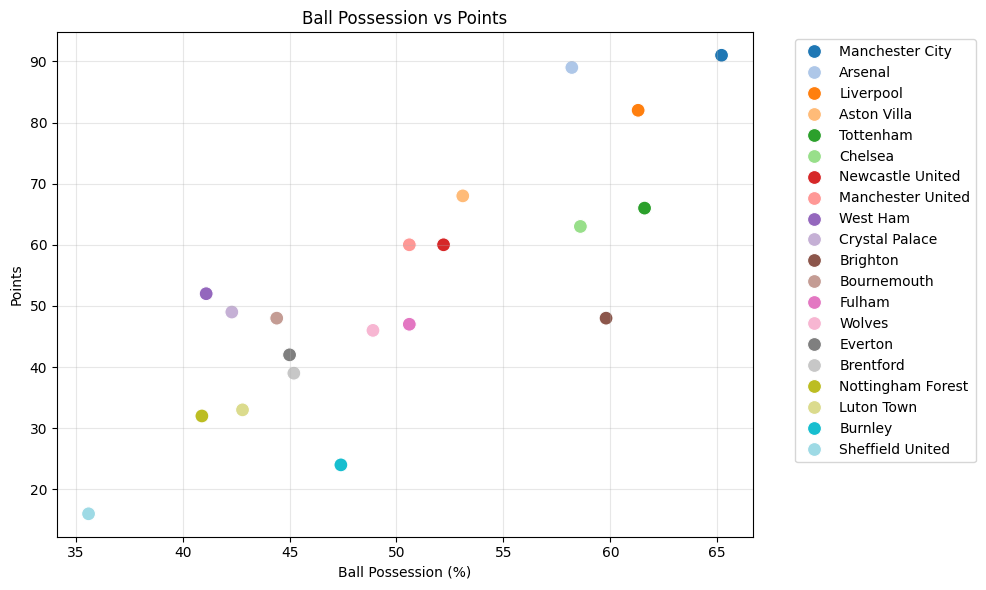

In [4]:
# 3. Possession vs Points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ball Possession (%)', y='Points', hue='Team', palette='tab20', s=100)
plt.title('Ball Possession vs Points')
plt.xlabel('Ball Possession (%)')
plt.ylabel('Points')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

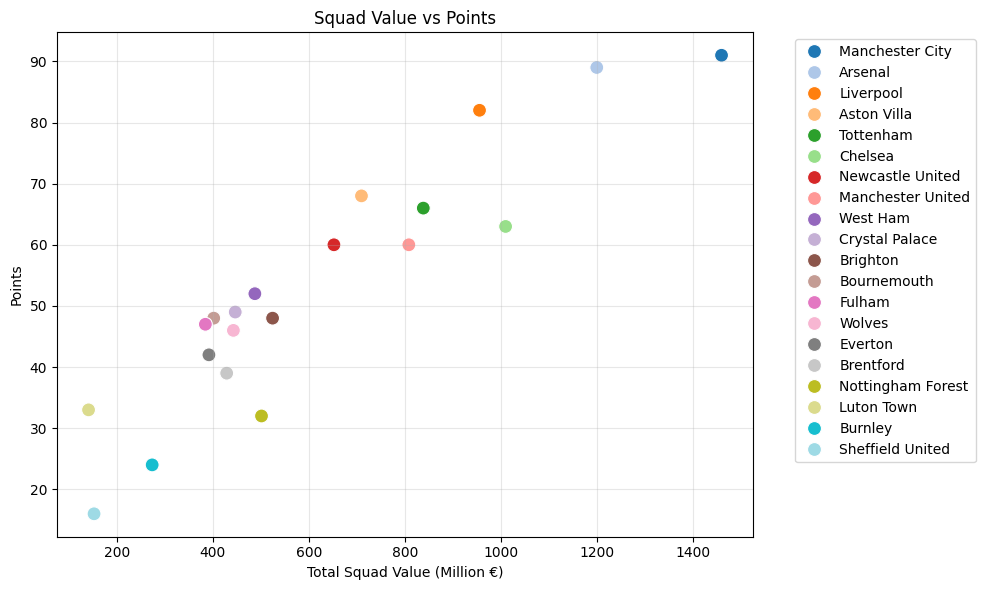

In [5]:
# 4. Squad Value vs Points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['Total Squad Value (€)']/1e6, y='Points', hue='Team', palette='tab20', s=100)
plt.title('Squad Value vs Points')
plt.xlabel('Total Squad Value (Million €)')
plt.ylabel('Points')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

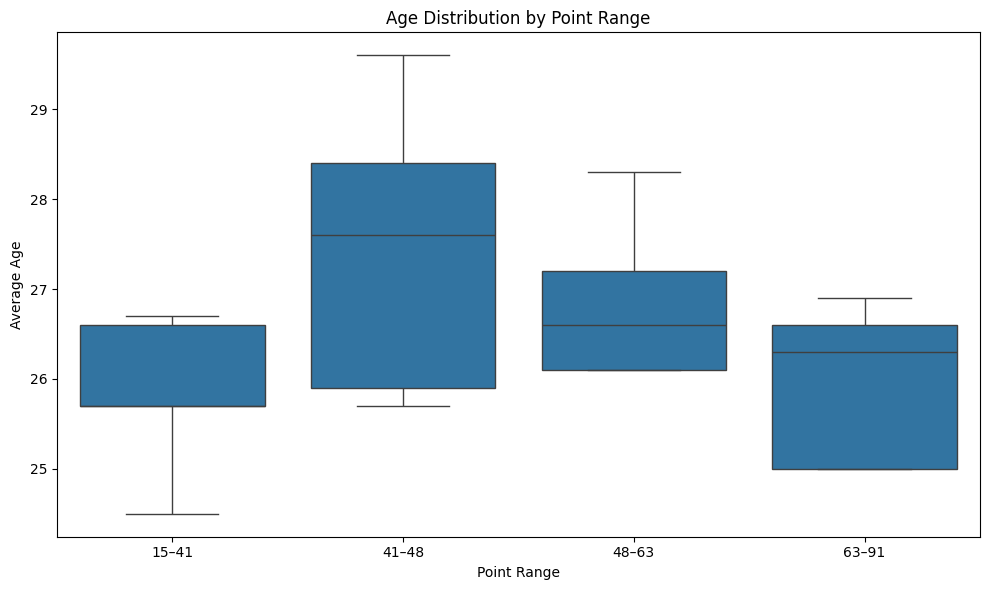

In [6]:
# 5. Age vs Performance
df['Point_Category'] = pd.qcut(df['Points'], q=4)
df['Point_Category_Label'] = df['Point_Category'].apply(lambda x: f"{int(x.left)}–{int(x.right)}")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Point_Category_Label', y='Average Age', showfliers=False)
plt.title('Age Distribution by Point Range')
plt.xlabel('Point Range')
plt.ylabel('Average Age')
plt.tight_layout()
plt.show()

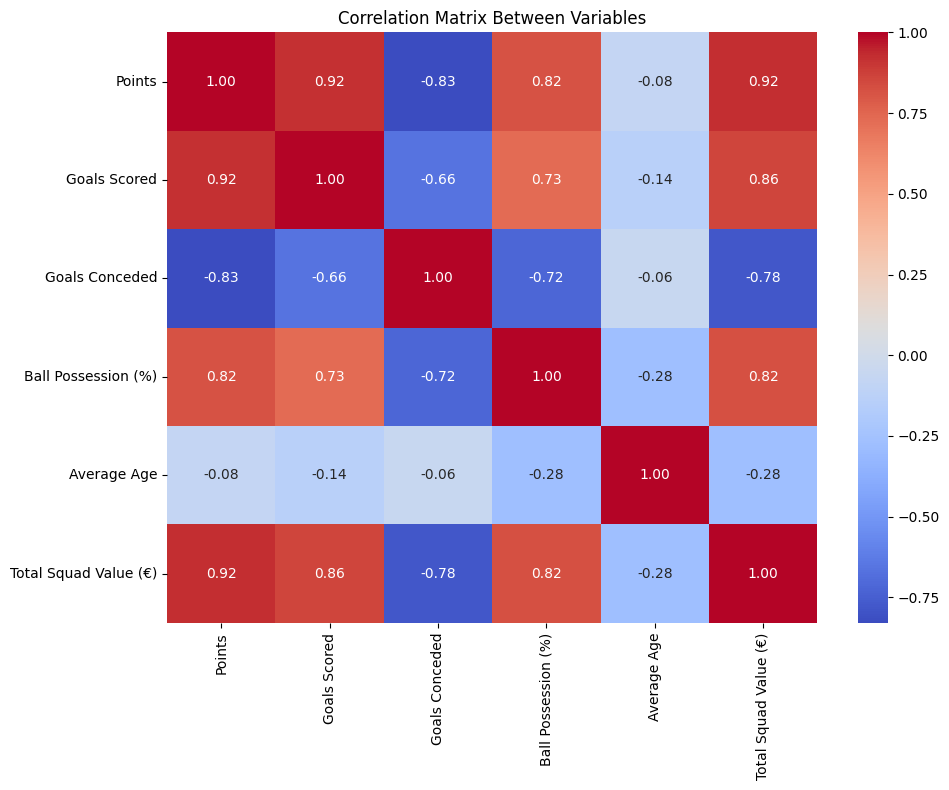

In [7]:
# 6. Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_cols = ['Points', 'Goals Scored', 'Goals Conceded', 'Ball Possession (%)', 'Average Age', 'Total Squad Value (€)']
correlation_matrix = df[correlation_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Between Variables')
plt.tight_layout()
plt.show()


--- Hypothesis 1: Squad Value >800M - Goals Per Match ---
T-statistic: 3.57
P-value: 0.0054
Result: Significant difference, p < 0.05 (Reject H0).


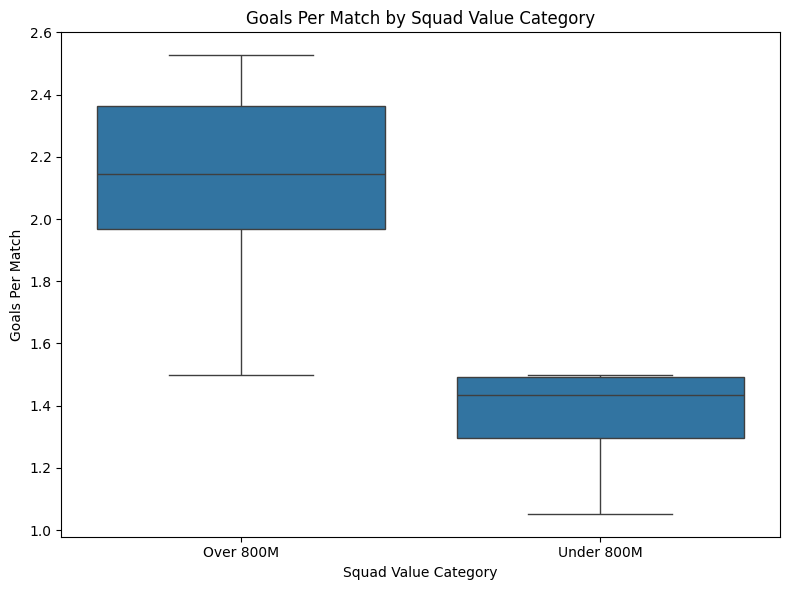

In [8]:
# Hypothesis 1: Squad value >800M and goals per match
df['Goals Per Match'] = df['Goals Scored'] / df['Matches Played']
df['Squad Value Category'] = df['Total Squad Value (€)'].apply(lambda x: 'Over 800M' if x > 800_000_000 else 'Under 800M')

group_high = df[df['Squad Value Category'] == 'Over 800M']['Goals Per Match']
group_low = df[df['Squad Value Category'] == 'Under 800M']['Goals Per Match']
t_stat, p_val = ttest_ind(group_high, group_low, equal_var=False)

print("\n--- Hypothesis 1: Squad Value >800M - Goals Per Match ---")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")
print("Result:", "Significant difference, p < 0.05 (Reject H0)." if p_val < 0.05 else "No significant difference, p > 0.05 (Fail to reject H0).")

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Squad Value Category', y='Goals Per Match', showfliers=False)
plt.title('Goals Per Match by Squad Value Category')
plt.xlabel('Squad Value Category')
plt.ylabel('Goals Per Match')
plt.tight_layout()
plt.show()


--- Hypothesis 2: Number of Foreign Players vs Points ---
Pearson Correlation: -0.23
P-value: 0.3380
Result: No significant correlation, p > 0.05 (Fail to reject H0).


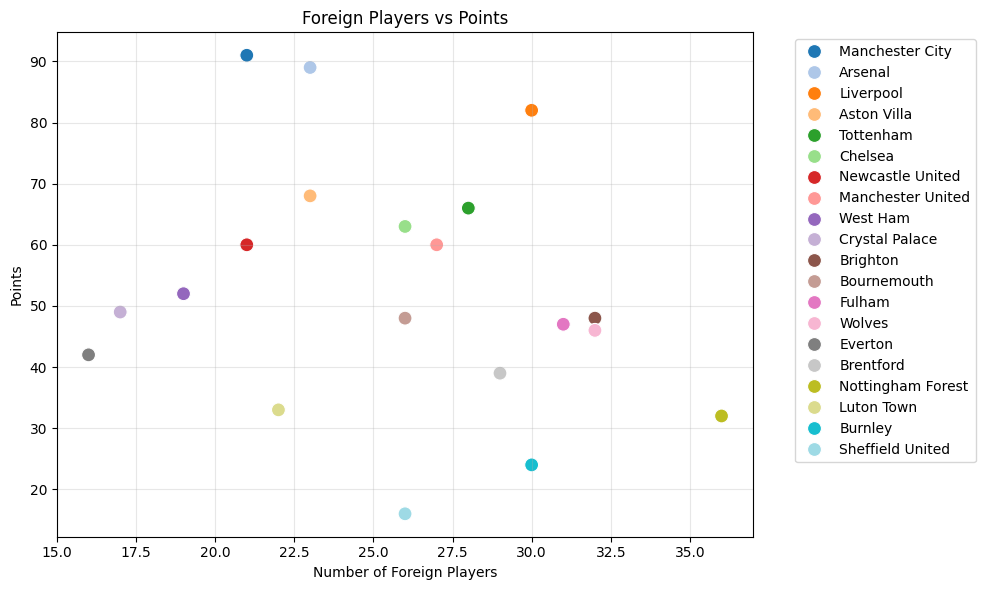

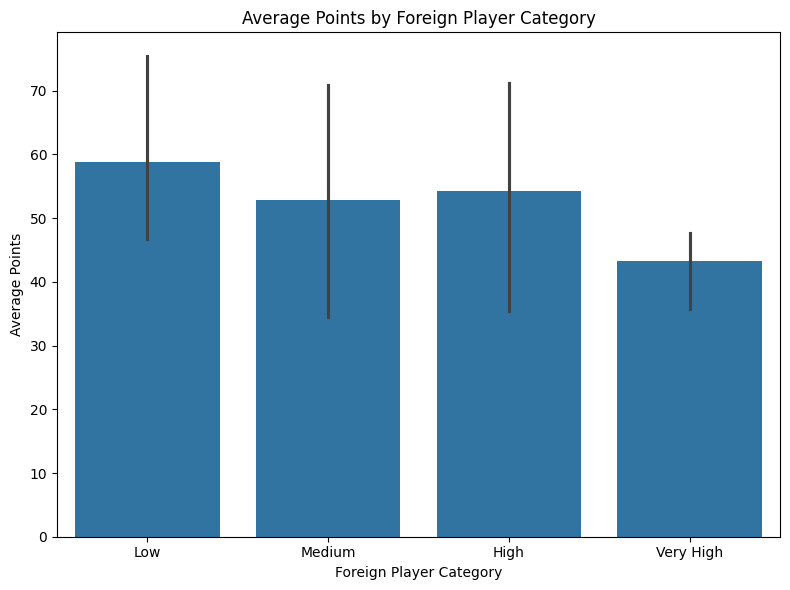

In [9]:
# Hypothesis 2: Foreign players and points
corr_lej, p_lej = pearsonr(df['Foreign Players'], df['Points'])
print("\n--- Hypothesis 2: Number of Foreign Players vs Points ---")
print(f"Pearson Correlation: {corr_lej:.2f}")
print(f"P-value: {p_lej:.4f}")
print("Result:", "Significant correlation, p < 0.05 (Reject H0)." if p_lej < 0.05 else "No significant correlation, p > 0.05 (Fail to reject H0).")

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Foreign Players', y='Points', hue='Team', palette='tab20', s=100)
plt.title('Foreign Players vs Points')
plt.xlabel('Number of Foreign Players')
plt.ylabel('Points')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

df['Foreign_Player_Category'] = pd.qcut(df['Foreign Players'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Foreign_Player_Category', y='Points', estimator='mean')
plt.title('Average Points by Foreign Player Category')
plt.xlabel('Foreign Player Category')
plt.ylabel('Average Points')
plt.tight_layout()
plt.show()


--- Hypothesis 3: xGA vs Points ---
Pearson Correlation: -0.32
P-value: 0.1721
Result: No significant correlation, p > 0.05 (Fail to reject H0).


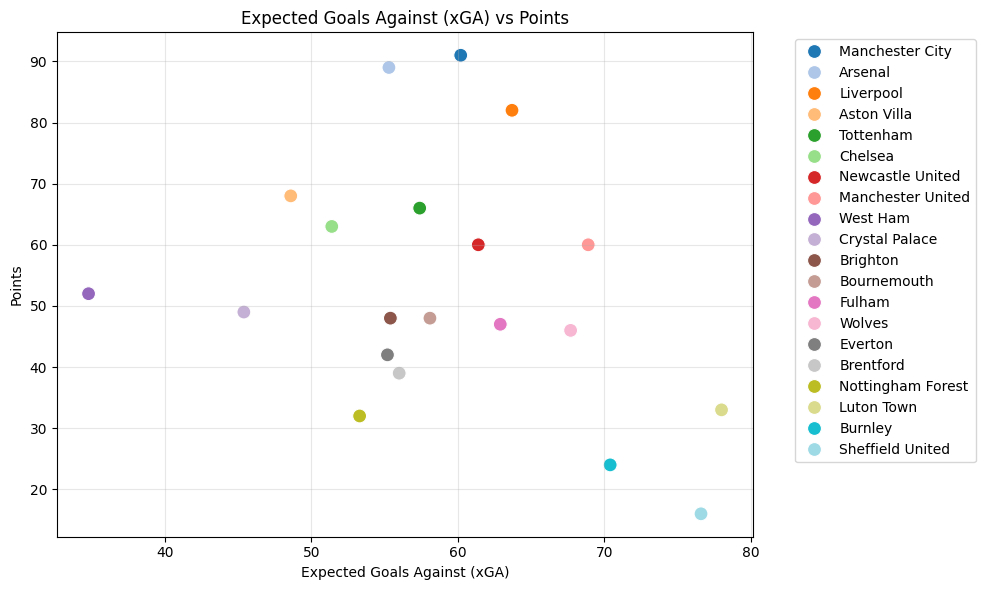

In [10]:
# Hypothesis 3: xGA and points
corr_xga, p_xga = pearsonr(df['Expected Goals Against (xGA)'], df['Points'])
print("\n--- Hypothesis 3: xGA vs Points ---")
print(f"Pearson Correlation: {corr_xga:.2f}")
print(f"P-value: {p_xga:.4f}")
print("Result:", "Significant negative correlation, p < 0.05 (Reject H0)." if p_xga < 0.05 else "No significant correlation, p > 0.05 (Fail to reject H0).")

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Expected Goals Against (xGA)', y='Points', hue='Team', palette='tab20', s=100)
plt.title('Expected Goals Against (xGA) vs Points')
plt.xlabel('Expected Goals Against (xGA)')
plt.ylabel('Points')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()